In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包

In [2]:
data = pd.read_excel('E:/文档系列/python 系列/TheData/total/11clean_area_invesments(91-17-RMB).xlsx')###retrieve data
def getstr(s):###year YYYY
    return str(s)[:4]
data['year'] = data['投资时间'].map(getstr)

In [3]:
### Investment situation of each primary industry every year
firstName1 = data['一级名称'].drop_duplicates().values###获取一级产业名称
firstName = [ff for ff in firstName1 if ff!='--']
firstNum = data.groupby(['year',"一级名称"], as_index=False)['投资金额(RMB)'].count()### #inveatments
firstAmount = data.groupby(['year',"一级名称"], as_index=False)['投资金额(RMB)'].sum()### amount
firstEngName = ['Manufacturing','Finance','Wholesale & Retail','Real Estate Development','Information transmission, software & technology service','Construction',
               'Leasing and business services','Utilities & Energy','Ransportation/Logistic/Distribution','Science & Research','Entertainment/Leisure/Sports & Fitness','Restaurant & Food Service',
               'Agriculture/Fishing/Forestry','Mining industry','Health & social work','Education','Personal Care & Services']

c=len(firstName)###一级产业数量
# sns.palplot(sns.color_palette('dark',26),Diverging)
# a=list(sns.color_palette("Accent", c))
# yj_color=dict(zip(firstName,a))
colors1 = plt.cm.tab20.colors
yj_color=dict(zip(firstName,colors1[0:c+0]))

In [4]:
###
plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题
xyear = firstNum['year'].drop_duplicates().values###获取一级产业名称
AFisrtN = []##all years
AFisrtA = []
AFisrtName = []
AFsumN = []
AFsumA = []
for i in xyear:
    yFisrtN = []
    yFisrtA = []
    FisrtName = []
    for j in range(firstNum.shape[0]):
        index = 0
        if firstNum['year'] [j] == i:
            if firstAmount['一级名称'][j] in firstName:
                yFisrtN.append(firstNum['投资金额(RMB)'][j])
                yFisrtA.append(firstAmount['投资金额(RMB)'][j])
                FisrtName.append(firstAmount['一级名称'][j])
                index = 1
#             else:
#                 yFisrtN.append(0)
#                 yFisrtA.append(0)
#                 FisrtName.append('null')
    AFisrtN.append(yFisrtN)
    AFisrtA.append(yFisrtA)
    AFisrtName.append(FisrtName)
    AFsumN.append(sum(yFisrtN))
    AFsumA.append(sum(yFisrtA))

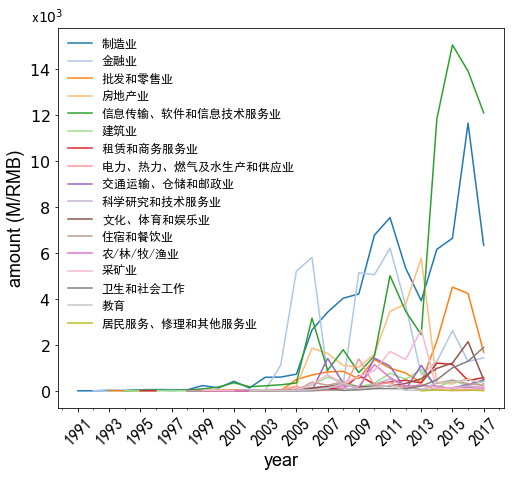

In [5]:
yearsL = list(map(str,list(range(1991,2018))))
from matplotlib.ticker import FuncFormatter   ### 今天的主角
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size' : 18,
}###设置横纵坐标的字体格式
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size' : 14,
}###设置横纵坐标的字体格式
fig = plt.figure(figsize=(8,7))
ax1 = fig.add_subplot(111)
plt.xticks(rotation=45)
plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题
xmajorLocator = MultipleLocator(2)
xminorLocator = MultipleLocator(1.0)
plt.tick_params(labelsize=16) #刻度字体大小13
y=np.array(AFsumA) 

# ax1.plot(yearsL,y, color = 'gray',linewidth=2)
ax1.set_ylabel('amount (M/RMB)',font2)
ax1.set_xlabel('year',font2)
# ax1.legend(loc='upper left')
ax1.yaxis.set_tick_params(color='black',colors='black',labelsize=16)

def formatnum(x, pos):
#     return x//10000
    return '$%.0f$' % (x/10000)
#     return '$%.1f$x$10^{4}$' % (x/10000)
def formatnum2(x, pos):
    return '$%.0f$' % (x/1000)
formatter = FuncFormatter(formatnum)
formatter2 = FuncFormatter(formatnum2)
ax1.yaxis.set_major_formatter(formatter)
for indu in firstName:
#     print(indu)
    df = firstAmount[firstAmount['一级名称'] == indu]
    df.index = df['year']
    df2 = df.reindex(index=yearsL)###按照年份补全
#     if max(df2['投资金额(RMB)']) > 300:
#         plt.plot(yearsL,df2['投资金额(RMB)'],label = indu)
#     else:
    plt.plot(yearsL,df2['投资金额(RMB)'],label=indu,color = yj_color[indu])
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
plt.text(-3, 160000, r'x$10^{3}$',size=14)
plt.legend(frameon=False,fontsize = 12)
plt.savefig('E:/0论文/0picture/3_9b.png',dpi=500, bbox_inches='tight')

In [6]:
################# 三级产业 ##################

In [7]:
### Investment situation of each primary industry every year
ThirdName1 = data['三级产业名称'].drop_duplicates().values###获取一级产业名称
ThirdName = [ff for ff in ThirdName1 if ff!='--']
ThirdNum = data.groupby(['year',"三级产业名称"], as_index=False)['投资金额(RMB)'].count()### #inveatments
ThirdAmount = data.groupby(['year',"三级产业名称"], as_index=False)['投资金额(RMB)'].sum()### amount
# thirdEngName = ['Manufacturing','Finance','Wholesale & Retail','Real Estate Development','Information transmission, software & technology service','Construction',
#                'Leasing and business services','Utilities & Energy','Ransportation/Logistic/Distribution','Science & Research','Entertainment/Leisure/Sports & Fitness','Restaurant & Food Service',
#                'Agriculture/Fishing/Forestry','Mining industry','Health & social work','Education','Personal Care & Services']

c=len(ThirdName)###一级产业数量
# sns.palplot(sns.color_palette('dark',26),Diverging)
# a=list(sns.color_palette("Accent", c))
# yj_color=dict(zip(firstName,a))
colors1 = plt.cm.tab20.colors
yj_color=dict(zip(ThirdName,colors1[0:c+0]))

In [8]:
dSj2=data.groupby(["三级产业名称"], as_index=False)['投资金额(RMB)'].count()###得到每一个一级产业的投资数
dSj2=dSj2[0:1].append(dSj2[2:])
sjsort=dSj2.sort_values(by="投资金额(RMB)" , ascending=False)###根据投资次数进行排序
sjName=sjsort['三级产业名称'].drop_duplicates().values###得到一级产业名称
c=len(sjName)###3级产业数量
# a=list(sns.color_palette("hls", c-20))
a = ['grey']*(c-20)
colors1 = plt.cm.tab20.colors
colors3 = list(colors1)+a
sj_color=dict(zip(sjName,colors3))######### 将排名前20的产业色彩，后面的为灰色

In [9]:
len(colors1)+c-20

93

In [10]:
###
plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题
xyear = ThirdNum['year'].drop_duplicates().values###获取一级产业名称
AThirdN = []##all years
AThirdA = []
AThirdName = []
ATsumN = []
ATsumA = []
for i in xyear:
    yThirdN = []
    yThirdA = []
    ThirdNames = []
    for j in range(ThirdNum.shape[0]):
        index = 0
        if ThirdNum['year'] [j] == i:
            if ThirdAmount['三级产业名称'][j] in ThirdName:
                yThirdN.append(ThirdNum['投资金额(RMB)'][j])
                yThirdA.append(ThirdAmount['投资金额(RMB)'][j])
                ThirdNames.append(ThirdAmount['三级产业名称'][j])
                index = 1
    AThirdN.append(yThirdN)
    AThirdA.append(yThirdA)
    AThirdName.append(ThirdNames)
    ATsumN.append(sum(yThirdN))
    ATsumA.append(sum(yThirdA))

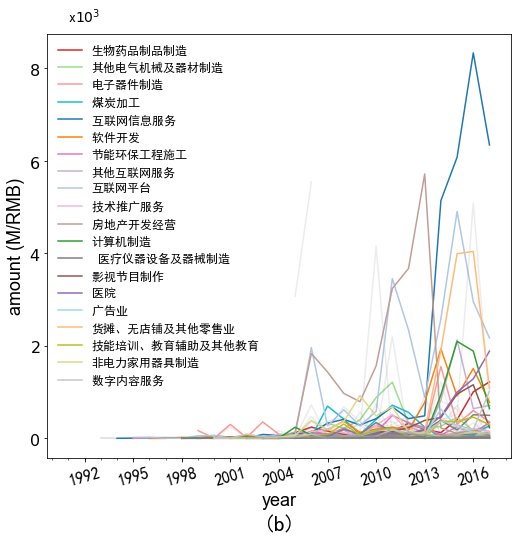

In [20]:
yearsL = list(map(str,list(range(1991,2018))))
x= np.arange(1991,2018)
from matplotlib.ticker import FuncFormatter   ### 今天的主角
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size' : 18,
}###设置横纵坐标的字体格式
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size' : 15,
}###设置横纵坐标的字体格式
fig = plt.figure(figsize=(8.3,7.8))
ax1 = fig.add_subplot(111)
plt.xticks(rotation=16)
plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题
xmajorLocator = MultipleLocator(3)
xminorLocator = MultipleLocator(1.0)
plt.tick_params(labelsize=16) #刻度字体大小13
y=np.array(ATsumA) 

# ax1.plot(yearsL,y, color = 'gray',linewidth=2)
ax1.set_ylabel('amount (M/RMB)',font2)
ax1.set_xlabel('year',font2)
# ax1.legend(loc='upper left')
ax1.yaxis.set_tick_params(color='black',colors='black',labelsize=16)

def formatnum(x, pos):
#     return x//10000
    return '$%.0f$' % (x/10000)
#     return '$%.1f$x$10^{4}$' % (x/10000)
def formatnum2(x, pos):
    return '$%.0f$' % (x/1000)
formatter = FuncFormatter(formatnum)
formatter2 = FuncFormatter(formatnum2)
ax1.yaxis.set_major_formatter(formatter)
for indu in ThirdName:
#     print(indu)
    df = ThirdAmount[ThirdAmount['三级产业名称'] == indu]
    df.index = df['year']
    df2 = df.reindex(index=yearsL)###按照年份补全
    if indu in sjName[:20]:
        plt.plot(x,df2['投资金额(RMB)'].values,color = sj_color[indu],label=indu)
#         print(type(df2['投资金额(RMB)'].values[0]))
    else:
        plt.plot(x,df2['投资金额(RMB)'].values,color = sj_color[indu],alpha=0.15)

plt.text(1991, 90000, r'x$10^{3}$',size=14)
plt.legend(frameon=False,fontsize = 12)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
plt.text(2003,-2*pow(10,4),'(b)',fontsize=22)
plt.savefig('E:/0论文/2picture/2_6b.png',dpi=500, bbox_inches='tight')